In [ ]:
from google.colab import drive 
drive.mount('/content/drive')  

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
from zipfile import ZipFile
file = "/content/drive/MyDrive/Nucleus.zip"

with ZipFile(file,'r') as zips:
  zips.extractall()
  print('Done')

Done


In [ ]:
%tensorflow_version 1.x


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
pip install 'h5py==2.10.0' --force-reinstall

  Using cached h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl (2.9 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lucid 0.3.10 requires umap-learn, which is not installed.
tensorflow 1.15.2 requires gast==0.2.2, but you have gast 0.5.3 which is incompatible.
lucid 0.3.10 requir

In [ ]:
files.upload()

Saving data_augmentation.py to data_augmentation.py


{'data_augmentation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:10:48 2020\n\n@author: KiranKharel\n"""\nfrom keras.preprocessing.image import ImageDataGenerator\nseed = 1\n\ndef perform_augmentation(x_check, y_check, split_size, BATCH_SIZE):\n    \n    #creating the training image and its respective mask\n    data_gen_args = dict(\n            shear_range=0.5,\n            rotation_range=40,\n            zoom_range=0.2,\n            width_shift_range=0.2,\n            height_shift_range=0.2,\n            fill_mode=\'reflect\'#nearest\n            )\n    \n    #creating training image and mask generator\n    image_datagen = ImageDataGenerator(**data_gen_args)\n    mask_datagen = ImageDataGenerator(**data_gen_args)\n    \n    #creating the validation Image and Mask generator\n    image_datagen_val = ImageDataGenerator()\n    mask_datagen_val = ImageDataGenerator()\n    \n    # Provide the same seed and keyword arguments to the fit and flow methods\n    image_datagen.fi

In [ ]:
files.upload()

Saving data_generation.py to data_generation.py


{'data_generation.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 17:52:14 2020\n\n@author: KiranKharel\n"""\n#importing libraries\nimport os\nimport sys\nimport numpy as np\nimport warnings\nimport cv2\nfrom tqdm import tqdm\nwarnings.filterwarnings(\'ignore\')\n#seeding\nseed = 42\n\nclass DataGen:\n    def __init__(self, ids, datasettype, path, image_size = 128, img_channels = 3):\n        self.ids = ids\n        self.path = path\n        self.image_size = image_size\n        self.datasettype = datasettype\n        self.img_channels = img_channels\n        \n    def __load__(self, id_name):\n        ##path \n        image_path = os.path.join(self.path, id_name, "images",id_name)+".png"\n        mask_path = os.path.join(self.path, id_name, "masks/")\n\n        #reading image\n        image = cv2.imread(image_path,1)\n        image = cv2.resize(image, (self.image_size, self.image_size))\n        \n        #reading mask\n        mask = np.zeros((self.image_size, self.image_s

In [ ]:
files.upload()

Saving UNet_Model.py to UNet_Model.py


{'UNet_Model.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:27:15 2020\n\n@author: KiranKharel\n"""\nfrom keras.models import Model\nfrom keras.layers import Input, UpSampling2D\nfrom keras.layers.core import Dropout, Lambda\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.pooling import MaxPooling2D\nfrom keras.layers import Concatenate\nfrom utils import mean_iou\n\nclass UNet:\n    def __init__(self, image_size = 128, img_channels = 3, kernel_size = (3,3), padding = \'same\', strides = 1, kernel_initializer = \'he_normal\', activation = \'relu\'):\n        self.image_size = image_size\n        self.img_channels = img_channels\n        self.kernel_size = kernel_size\n        self.padding = padding\n        self.strides = strides\n        self.kernel_initializer = kernel_initializer\n        self.activation = activation\n\n    def down_block(self, x, filters):\n        c = Conv2D(filters,\n                self.kernel_size, \n                padding=self

In [ ]:
files.upload()

Saving UNet_Model1.py to UNet_Model1.py


{'UNet_Model1.py': b'# -*- coding: utf-8 -*-\r\n"""\r\nCreated on Tue Feb  4 18:27:15 2020\r\n\r\n@author: KiranKharel\r\n"""\r\nfrom keras.models import Model\r\nfrom keras.layers import Input, UpSampling2D\r\nfrom keras.layers.core import Dropout, Lambda\r\nfrom keras.layers.convolutional import Conv2D\r\nfrom keras.layers.pooling import MaxPooling2D\r\nfrom keras.layers import Concatenate\r\nfrom utils import mean_iou\r\n\r\n\r\nclass UNet:\r\n    def __init__(self, image_size=128, img_channels=3, kernel_size=(3, 3), padding=\'same\', strides=1,\r\n                 kernel_initializer=\'he_normal\', activation=\'relu\'):\r\n        self.image_size = image_size\r\n        self.img_channels = img_channels\r\n        self.kernel_size = kernel_size\r\n        self.padding = padding\r\n        self.strides = strides\r\n        self.kernel_initializer = kernel_initializer\r\n        self.activation = activation\r\n\r\n    def down_block(self, x, filters):\r\n        c = Conv2D(filters,\r\n

In [ ]:
files.upload()

Saving UNet_Model2.py to UNet_Model2.py


{'UNet_Model2.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:27:15 2020\n\n@author: KiranKharel\n"""\nfrom keras.models import Model\nfrom keras.layers import Input, UpSampling2D,Conv2DTranspose\nfrom keras.layers.core import Dropout, Lambda\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.pooling import MaxPooling2D\nfrom keras.layers import Concatenate\nfrom utils import mean_iou\n\n\nclass UNet:\n    def __init__(self, image_size = 128, img_channels = 3, kernel_size = (3,3), padding = \'same\', strides = 1, kernel_initializer = \'he_normal\', activation = \'relu\'):\n        self.image_size = image_size\n        self.img_channels = img_channels\n        self.kernel_size = kernel_size\n        self.padding = padding\n        self.strides = strides\n        self.kernel_initializer = kernel_initializer\n        self.activation = activation\n\n    def down_block(self, x, filters):\n        c = Conv2D(filters,\n                self.kernel_size, \n         

In [ ]:
files.upload()

Saving utils.py to utils.py


{'utils.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:32:45 2020\n\n@author: Khare\n"""\nimport numpy as np\nimport tensorflow as tf\nfrom keras import backend as K\n#evaluation metric\n#Intersection over UNion (IOU) metric:\ndef mean_iou(y_true, y_pred):\n    prec = []\n    for t in np.arange(0.5, 1.0, 0.05):\n        y_pred_ = tf.to_int32(y_pred > t)\n        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)\n        K.get_session().run(tf.local_variables_initializer())\n        with tf.control_dependencies([up_opt]):\n            score = tf.identity(score)\n        prec.append(score)\n    return K.mean(K.stack(prec), axis=0)'}

In [ ]:
files.upload()

Saving mask_tools.py to mask_tools.py


{'mask_tools.py': b'#!/usr/bin/env python3\r\nimport argparse\r\nfrom pathlib import Path\r\n\r\nimport numpy as np\r\nfrom PIL import Image\r\n\r\n\r\ndef create_masks():\r\n    """ Create masks from red color above original image.\r\n    """\r\n    parser = argparse.ArgumentParser()\r\n    parser.add_argument(\'root\')\r\n    args = parser.parse_args()\r\n    root = Path(args.root)\r\n    images_root = root / \'images\'\r\n    masks_root = root / \'masks\'\r\n    assert images_root.is_dir() and masks_root.is_dir()\r\n    for mask_path in list(images_root.glob(\'mask*.png\')):\r\n        a = np.array(Image.open(mask_path))\r\n        # filter only red color\r\n        mask = (a[:, :, 0] > 127) & (np.max(a[:, :, 1:3], axis=2) < 80)\r\n        out_path = masks_root / mask_path.name\r\n        _save_mask(mask, out_path)\r\n        mask_path.unlink()\r\n        print(f\'{mask_path} -> {out_path}\')\r\n\r\n\r\ndef ensure_mask():\r\n    """ Ensure that a given (edited) mask shows what is it

In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from data_generation import *
from mask_tools import *
from data_augmentation import perform_augmentation
from utils import mean_iou
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [ ]:
import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image

import os, sys, random, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize

In [ ]:
IMAGE_SIZE = 128
BATCH_SIZE = 16
IMG_CHANNELS = 3
EPOCHS = 5
TRAIN_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_train/'
TEST_PATH = '/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/stage1_test/'

#Training AND testing Ids
train_ids = next (os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

print(len(train_ids), len(test_ids))

670 65


In [ ]:
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
BATCH_SIZE = 10 
IMG_WIDTH = 128 
IMG_HEIGHT = 128 
IMG_CHANNELS = 3

Firstly, We read the training images and their respective mask using the class DataGen

In [ ]:
gen = DataGen(train_ids, "train", TRAIN_PATH, image_size=IMAGE_SIZE)
X_train, Y_train = gen.__getitems__()


Getting and Resizing train images and masks.....


100%|██████████| 670/670 [00:38<00:00, 17.59it/s]


In [ ]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]
np.random.seed(10)


In [ ]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

Getting and resizing train images and masks ... 


 54%|█████▎    | 359/670 [04:32<03:55,  1.32it/s]


KeyboardInterrupt: ignored

In [ ]:
X_test = np.zeros((len(test_ids), IMAGE_SIZE, IMAGE_SIZE, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMAGE_SIZE, IMAGE_SIZE), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing test images ... 


100%|██████████| 65/65 [00:02<00:00, 28.51it/s]

Done!


In [ ]:
image_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')
mask_datagen = image.ImageDataGenerator(shear_range=0.5, rotation_range=50, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='reflect')

image_datagen.fit(X_train[:int(X_train.shape[0]*0.9)], augment=True, seed=seed)
mask_datagen.fit(Y_train[:int(Y_train.shape[0]*0.9)], augment=True, seed=seed)

x=image_datagen.flow(X_train[:int(X_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y=mask_datagen.flow(Y_train[:int(Y_train.shape[0]*0.9)],batch_size=BATCH_SIZE,shuffle=True, seed=seed)

image_datagen_val = image.ImageDataGenerator()
mask_datagen_val = image.ImageDataGenerator()

image_datagen_val.fit(X_train[int(X_train.shape[0]*0.9):], augment=True, seed=seed)
mask_datagen_val.fit(Y_train[int(Y_train.shape[0]*0.9):], augment=True, seed=seed)

x_val=image_datagen_val.flow(X_train[int(X_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)
y_val=mask_datagen_val.flow(Y_train[int(Y_train.shape[0]*0.9):],batch_size=BATCH_SIZE,shuffle=True, seed=seed)

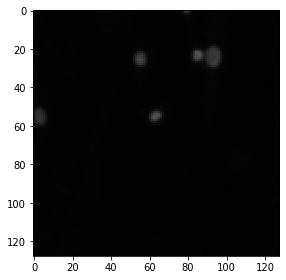

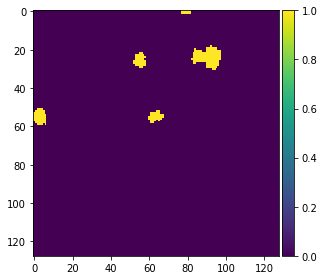

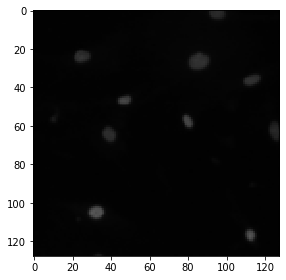

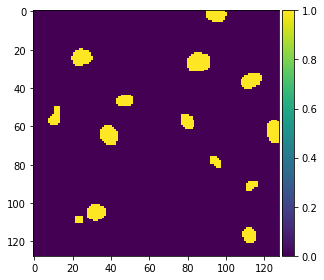

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

imshow(x.next()[0].astype(np.uint8))
plt.show()

imshow(np.squeeze(y.next()[0].astype(np.uint8)))
plt.show()

imshow(x_val.next()[0].astype(np.uint8))
plt.show()

imshow(np.squeeze(y_val.next()[0].astype(np.uint8)))
plt.show()

In [ ]:
#data augmentation using predefined class
x, y, x_val, y_val = perform_augmentation(X_train, Y_train, split_size=0.9, BATCH_SIZE=BATCH_SIZE)

In [ ]:
#combine generators into one which yields image and masks
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)

In [ ]:
len(x), len(y), len(x_val), len(y_val)

(38, 38, 5, 5)

In [ ]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):
        y_pred_ = tf.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)

    return K.mean(K.stack(prec), axis=0)

In [ ]:
# U-NET
from keras import backend as K
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)


c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)


c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)


c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)


u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)


u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)


u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)


u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)


outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)


model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]      

In [ ]:
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('/content/drive/MyDrive/model.h5', verbose=1, save_best_only=True)

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250,
                              epochs=3, callbacks=[earlystopper, checkpointer])

Epoch 1/3
250/250 [==============================] - 526s 2s/step - loss: 0.1370 - mean_iou: 0.7526 - val_loss: 0.1272 - val_mean_iou: 0.7737

Epoch 00001: val_loss improved from inf to 0.12718, saving model to /content/drive/MyDrive/model.h5
Epoch 2/3
250/250 [==============================] - 526s 2s/step - loss: 0.1134 - mean_iou: 0.7874 - val_loss: 0.0995 - val_mean_iou: 0.7983

Epoch 00002: val_loss improved from 0.12718 to 0.09947, saving model to /content/drive/MyDrive/model.h5
Epoch 3/3
250/250 [==============================] - 505s 2s/step - loss: 0.1057 - mean_iou: 0.8058 - val_loss: 0.1832 - val_mean_iou: 0.8120

Epoch 00003: val_loss did not improve from 0.09947


In [ ]:
model = load_model('/content/drive/MyDrive/model.h5', custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))


65/65 [==============================] - 3s 40ms/step


In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

In [ ]:
def jaccard_distance(y_true, y_pred, smooth=100):
    """ Calculates mean of Jaccard distance as a loss function """
    intersection = tf.reduce_sum(y_true * y_pred, axis=(1,2))
    sum_ = tf.reduce_sum(y_true + y_pred, axis=(1,2))
    jac = (intersection + smooth) / (sum_ - intersection + smooth)
    jd =  (1 - jac) * smooth
    return tf.reduce_mean(jd)

In [ ]:
#Build the model
from keras import backend as K

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[jaccard_distance,dice_coef,'accuracy'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 128, 128, 16) 0           conv2d_38[0][0]                 

In [ ]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/main_model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, verbose=1,monitor='val_acc'),  tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=30, callbacks=callbacks)

Train on 603 samples, validate on 67 samples
Epoch 1/30
603/603 [==============================] - 111s 184ms/sample - loss: 0.4901 - jaccard_distance: 87.4717 - dice_coef: 0.2131 - acc: 0.8399 - val_loss: 0.2965 - val_jaccard_distance: 79.9039 - val_dice_coef: 0.3168 - val_acc: 0.8516
Epoch 2/30
603/603 [==============================] - 113s 187ms/sample - loss: 0.2842 - jaccard_distance: 76.5572 - dice_coef: 0.3420 - acc: 0.8472 - val_loss: 0.2199 - val_jaccard_distance: 70.1243 - val_dice_coef: 0.4210 - val_acc: 0.8662
Epoch 3/30
603/603 [==============================] - 110s 183ms/sample - loss: 0.2039 - jaccard_distance: 63.3369 - dice_coef: 0.5115 - acc: 0.8902 - val_loss: 0.1536 - val_jaccard_distance: 47.7506 - val_dice_coef: 0.6521 - val_acc: 0.9412
Epoch 4/30
603/603 [==============================] - 109s 181ms/sample - loss: 0.1545 - jaccard_distance: 45.3854 - dice_coef: 0.6840 - acc: 0.9397 - val_loss: 0.1202 - val_jaccard_distance: 38.5431 - val_dice_coef: 0.7394 - val

In [ ]:
#print(history.params)

# check the keys of history object
print(results.history)

{'loss': [0.5798565476490293, 0.3130396891193801, 0.21918054827014802, 0.15536061297502882, 0.1321147124639791, 0.12458734072213544, 0.11719848744410583, 0.11447893631695515, 0.10970260983774713, 0.10324681279671133, 0.09927319470873322, 0.0975068606572167, 0.09450208550167716, 0.09607571647633763, 0.09504234903240283, 0.08943624738881838, 0.08725738668718544, 0.08924756325151197, 0.08561305747449299, 0.08347876188322086, 0.083690222791376, 0.08543653343842793, 0.08479750225595376, 0.08253688991662875, 0.07916148163835406, 0.0814064128284233], 'jaccard_distance': [84.85047, 72.77407, 55.7597, 36.101227, 31.75509, 29.133808, 28.70502, 28.197622, 26.890284, 25.130478, 24.9016, 24.525911, 23.97506, 24.100756, 24.155989, 22.89062, 22.492853, 22.62187, 22.225931, 21.801659, 21.587194, 21.86805, 22.124723, 21.093954, 21.000738, 21.154245], 'dice_coef': [0.26548347, 0.42834672, 0.60003614, 0.75769883, 0.8016447, 0.81716996, 0.8241143, 0.83089, 0.8367307, 0.8493341, 0.85274553, 0.8563297, 0.86

In [ ]:
df_result = pd.DataFrame(results.history)
df_result.sort_values('val_loss', ascending=True, inplace = True)
df_result

,loss,jaccard_distance,dice_coef,acc,val_loss,val_jaccard_distance,val_dice_coef,val_acc
22,0.084798,22.124723,0.876082,0.966980,0.094029,23.943050,0.878828,0.965724
16,0.087257,22.492853,0.870353,0.966120,0.096768,22.915857,0.878169,0.964753
24,0.079161,21.000738,0.882341,0.968645,0.097269,23.107164,0.891668,0.965176
19,0.083479,21.801659,0.876940,0.967436,0.097625,20.885357,0.892630,0.965392
23,0.082537,21.093954,0.878900,0.967810,0.098838,24.052322,0.868526,0.964876
20,0.083690,21.587194,0.877097,0.967298,0.100761,19.736876,0.897143,0.964317
18,0.085613,22.225931,0.871767,0.966611,0.103559,24.152767,0.878494,0.962905
25,0.081406,21.154245,0.881023,0.967723,0.104225,23.067249,0.882861,0.962150
13,0.096076,24.100756,0.861090,0.963287,0.104820,25.567558,0.864378,0.962381
17,0.089248,22.621870,0.870790,0.965562,0.105049,26.228781,0.862067,0.961417


In [ ]:
acc=results.history['val_acc']
max_value =max(acc)
print(max_value)

TypeError: ignored

In [ ]:
# summarize history for accuracy
plt.plot(results.history['val_accuracy'],label='Accuracy')
plt.plot(results.history['val_dice_coef'],label='Dice coef')
plt.plot(results.history['val_jaccard_distance'],label='Jaccard Distance')
plt.title('Evaluation metrics')
plt.ylabel('Accuracy, Dice coef, Jaccard Distance')
plt.xlabel('epoch')
plt.legend()
plt.show()

KeyError: ignored

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_9 (Dropout)             (None, 128, 128, 16) 0           conv2d_19[0][0]                  
____________________________________________________________________________________________

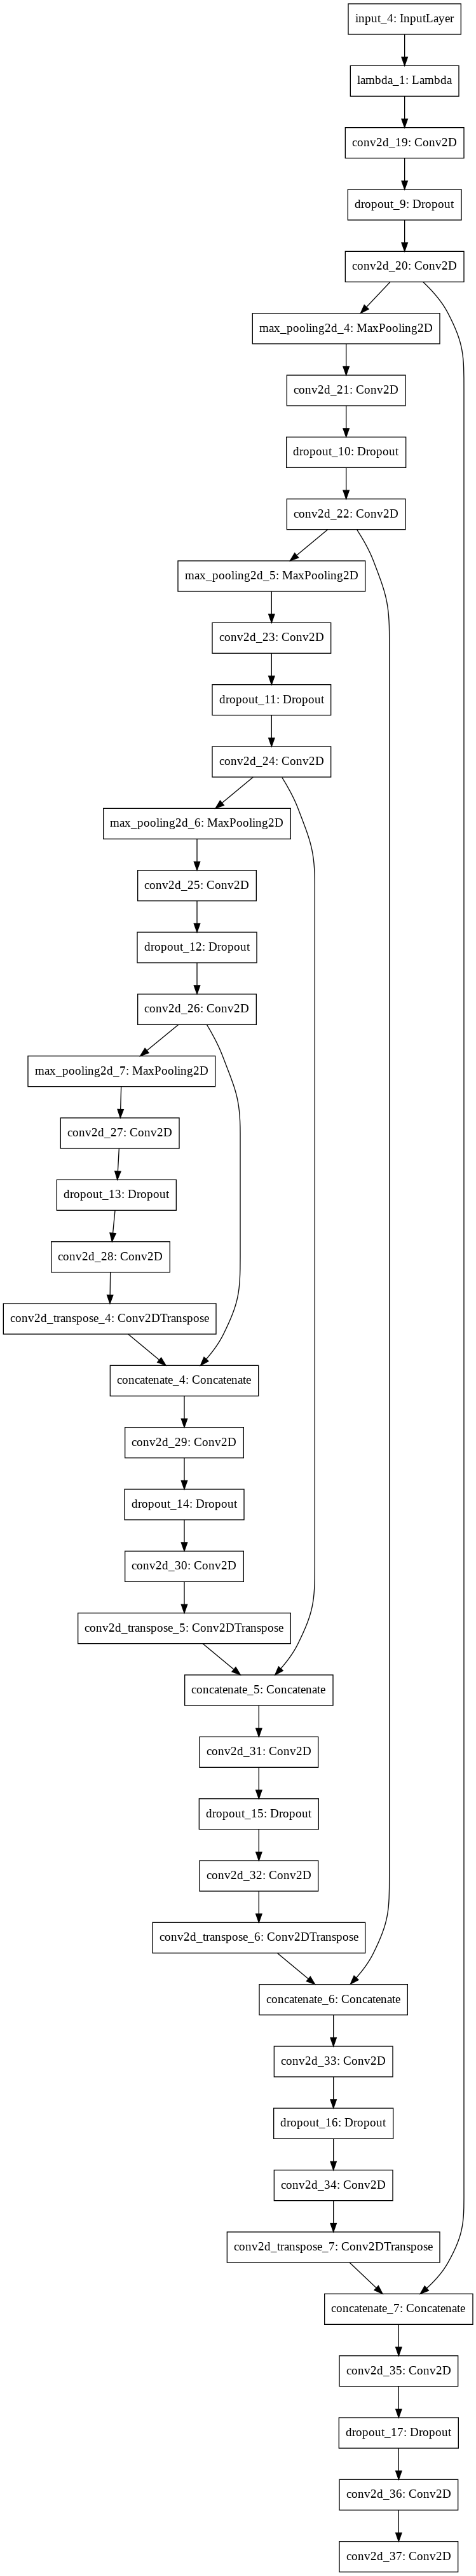

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Thesis_Model_Con2D_T.png')

In [ ]:
# U-NET
from keras import backend as K
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)


c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)


c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)


c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)


c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)


u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)


u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)


u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)


u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)


outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)


model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef,'accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_10 (Dropout)            (None, 128, 128, 16) 0           conv2d_20[0][0]                 

In [ ]:
earlystopper = EarlyStopping(patience=3, monitor='val_loss',verbose=1)
checkpointer = ModelCheckpoint('/content/drive/MyDrive/model.h5', verbose=1, save_best_only=True)

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250,
                              epochs=20, callbacks=[earlystopper, checkpointer])


Epoch 1/20
250/250 [==============================] - 534s 2s/step - loss: 0.2218 - dice_coef: 0.6646 - accuracy: 0.8671 - val_loss: 0.1676 - val_dice_coef: 0.8240 - val_accuracy: 0.9459

Epoch 00001: val_loss improved from inf to 0.16763, saving model to /content/drive/MyDrive/model.h5
Epoch 2/20
250/250 [==============================] - 546s 2s/step - loss: 0.1259 - dice_coef: 0.8135 - accuracy: 0.9047 - val_loss: 0.0875 - val_dice_coef: 0.8384 - val_accuracy: 0.9530

Epoch 00002: val_loss improved from 0.16763 to 0.08751, saving model to /content/drive/MyDrive/model.h5
Epoch 3/20
250/250 [==============================] - 549s 2s/step - loss: 0.1113 - dice_coef: 0.8372 - accuracy: 0.9080 - val_loss: 0.0891 - val_dice_coef: 0.8596 - val_accuracy: 0.9610

Epoch 00003: val_loss did not improve from 0.08751
Epoch 4/20
250/250 [==============================] - 519s 2s/step - loss: 0.1043 - dice_coef: 0.8443 - accuracy: 0.9106 - val_loss: 0.1120 - val_dice_coef: 0.8678 - val_accuracy: 

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
from pathlib import Path
import argparse
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
sys.argv=['']
del sys


def dice(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)

def general_dice(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return dice(y_true, y_pred)

def jaccard(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)

def general_jaccard(y_true, y_pred):
    if y_true.sum() == 0:
        if y_pred.sum() == 0:
            return 1
        else:
            return 0

    return jaccard(y_true, y_pred)

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    arg = parser.add_argument
    arg('-ground_truth_dir', type=str,  required=True, help='path where ground truth images are located')
    arg('-pred_dir', type=str, required=True,  help='path with predictions')
    arg('-threshold', type=float, default=0.2, required=False,  help='crack threshold detection')
    args = parser.parse_args()

    result_dice = []
    result_jaccard = []

    paths = [path for path in  Path(args.ground_truth_dir).glob('*')]
    for file_name in tqdm(paths):
        y_true = (cv2.imread(str(file_name), 0) > 0).astype(np.uint8)

        pred_file_name = Path(args.pred_dir) / file_name.name
        if not pred_file_name.exists():
            print(f'missing prediction for file {file_name.name}')
            continue

        pred_image = (cv2.imread(str(pred_file_name), 0) > 255 * args.threshold).astype(np.uint8)
        y_pred = pred_image

        # print(y_true.max(), y_true.min())
        # plt.subplot(131)
        # plt.imshow(y_true)
        # plt.subplot(132)
        # plt.imshow(y_pred)
        # plt.subplot(133)
        # plt.imshow(y_true)
        # plt.imshow(y_pred, alpha=0.5)
        # plt.show()

        result_dice += [dice(y_true, y_pred)]
        result_jaccard += [jaccard(y_true, y_pred)]

    print('Dice = ', np.mean(result_dice), np.std(result_dice))
    print('Jaccard = ', np.mean(result_jaccard), np.std(result_jaccard))

usage:  [-h] -ground_truth_dir GROUND_TRUTH_DIR -pred_dir PRED_DIR
        [-threshold THRESHOLD]
: error: the following arguments are required: -ground_truth_dir, -pred_dir


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
files.upload()

Saving programme.py to programme.py


{'programme.py': b"from pathlib import Path\r\nimport argparse\r\nimport cv2\r\nimport numpy as np\r\nfrom tqdm import tqdm\r\nimport matplotlib.pyplot as plt\r\n\r\ndef dice(y_true, y_pred):\r\n    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)\r\n\r\ndef general_dice(y_true, y_pred):\r\n    if y_true.sum() == 0:\r\n        if y_pred.sum() == 0:\r\n            return 1\r\n        else:\r\n            return 0\r\n\r\n    return dice(y_true, y_pred)\r\n\r\ndef jaccard(y_true, y_pred):\r\n    intersection = (y_true * y_pred).sum()\r\n    union = y_true.sum() + y_pred.sum() - intersection\r\n    return (intersection + 1e-15) / (union + 1e-15)\r\n\r\ndef general_jaccard(y_true, y_pred):\r\n    if y_true.sum() == 0:\r\n        if y_pred.sum() == 0:\r\n            return 1\r\n        else:\r\n            return 0\r\n\r\n    return jaccard(y_true, y_pred)\r\n\r\nif __name__ == '__main__':\r\n    parser = argparse.ArgumentParser()\r\n    arg = parser.add_a

In [ ]:
%%writefile programme.py

import argparse

parser = argparse.ArgumentParser()

parser.parse_args()

Writing programme.py


In [ ]:
def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = y_true * y_pred
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

In [ ]:
model.score(X_test,y_pred)

NameError: ignored

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
np.argmax(y_pred[0])

NameError: ignored

In [ ]:
help(model)

Help on Functional in module keras.engine.functional object:

class Functional(keras.engine.training.Model)
 |  Functional(*args, **kwargs)
 |  
 |  A `Functional` model is a `Model` defined as a directed graph of layers.
 |  
 |  Three types of `Model` exist: subclassed `Model`, `Functional` model,
 |  and `Sequential` (a special case of `Functional`).
 |  In general, more Keras features are supported with `Functional`
 |  than with subclassed `Model`s, specifically:
 |  
 |  - Model cloning (`keras.models.clone`)
 |  - Serialization (`model.get_config()/from_config`, `model.to_json()`
 |  - Whole-model saving (`model.save()`)
 |  
 |  A `Functional` model can be instantiated by passing two arguments to
 |  `__init__`. The first argument is the `keras.Input` Tensors that represent
 |  the inputs to the model. The second argument specifies the output
 |  tensors that represent the outputs of this model. Both arguments can be a
 |  nested structure of tensors.
 |  
 |  Example:
 |  
 | 

In [ ]:
#print(history.params)

# check the keys of history object
print(results.history)

{'loss': [0.07056869566440582, 0.06794468313455582, 0.06744768470525742, 0.06697331368923187], 'accuracy': [0.9720869660377502, 0.9731239080429077, 0.9735006093978882, 0.9735442399978638], 'val_loss': [0.08248645812273026, 0.0811147689819336, 0.08340667188167572, 0.0869421511888504], 'val_accuracy': [0.9674801230430603, 0.9685149788856506, 0.9673079252243042, 0.96489018201828]}


In [ ]:

df_result = pd.DataFrame(results.history)
df_result.sort_values('val_loss', ascending=True, inplace = True)
df_result

,loss,accuracy,val_loss,val_accuracy
1,0.067945,0.973124,0.081115,0.968515
0,0.070569,0.972087,0.082486,0.967480
2,0.067448,0.973501,0.083407,0.967308
3,0.066973,0.973544,0.086942,0.964890


In [ ]:
## Dataset for prediction
'''result = model.predict(X_test)

result = result > 0.5
print(result)'''

array([[[[1.75269395e-01],
         [5.64154088e-02],
         [3.34909856e-02],
         ...,
         [2.68283486e-02],
         [3.96402180e-02],
         [9.84603167e-02]],

        [[6.65261447e-02],
         [1.17309093e-02],
         [3.41197848e-03],
         ...,
         [2.14818120e-03],
         [4.82735038e-03],
         [2.39523947e-02]],

        [[3.87521684e-02],
         [3.96618247e-03],
         [7.32839108e-04],
         ...,
         [3.75717878e-04],
         [8.81075859e-04],
         [9.92771983e-03]],

        ...,

        [[2.03940570e-02],
         [1.88577175e-03],
         [3.41325998e-04],
         ...,
         [4.80055809e-04],
         [4.13739681e-03],
         [4.07688618e-02]],

        [[3.45753431e-02],
         [4.34538722e-03],
         [1.05074048e-03],
         ...,
         [3.09211016e-03],
         [2.67943144e-02],
         [1.95398629e-01]],

        [[1.21020436e-01],
         [3.35042179e-02],
         [1.36508942e-02],
         ...,
 

In [ ]:
result0[0]

array([[[1.7526940e-01],
        [5.6415409e-02],
        [3.3490986e-02],
        ...,
        [2.6828349e-02],
        [3.9640218e-02],
        [9.8460317e-02]],

       [[6.6526145e-02],
        [1.1730909e-02],
        [3.4119785e-03],
        ...,
        [2.1481812e-03],
        [4.8273504e-03],
        [2.3952395e-02]],

       [[3.8752168e-02],
        [3.9661825e-03],
        [7.3283911e-04],
        ...,
        [3.7571788e-04],
        [8.8107586e-04],
        [9.9277198e-03]],

       ...,

       [[2.0394057e-02],
        [1.8857718e-03],
        [3.4132600e-04],
        ...,
        [4.8005581e-04],
        [4.1373968e-03],
        [4.0768862e-02]],

       [[3.4575343e-02],
        [4.3453872e-03],
        [1.0507405e-03],
        ...,
        [3.0921102e-03],
        [2.6794314e-02],
        [1.9539863e-01]],

       [[1.2102044e-01],
        [3.3504218e-02],
        [1.3650894e-02],
        ...,
        [3.1061292e-02],
        [1.4212587e-01],
        [3.6121491e-01]]

In [ ]:

model = load_model('/content/model.h5')
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))


AttributeError: ignored

In [ ]:
pip install mlxtend  

In [ ]:
!pip install mlxtend  

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [ ]:
mat=confusion_matrix(X_test,y_pred)
plot_confusion_matrix(conf_mat=mat)

ValueError: ignored

In [ ]:
gen = DataGen(test_ids, "test", TEST_PATH, image_size=IMAGE_SIZE)
X_test, Y_test = gen.__getitems__()

Getting and Resizing train images and masks.....


  0%|          | 0/77 [00:00<?, ?it/s]


error: ignored

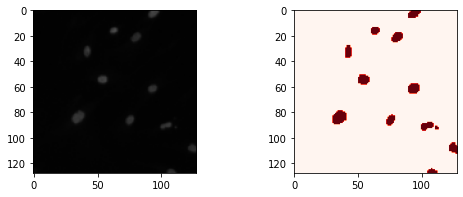

In [ ]:
#plotting the corresponding nucleus and its respective mask
index = random.randint(0, len(X_train)-1)

fig, ax = plt.subplots(1, 2, figsize = (8,3))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(X_train[index])
#plt.imshow(np.reshape(y_check[index], (IMAGE_SIZE, IMAGE_SIZE)),cmap='gray')
plt.imshow(np.squeeze(Y_train)[index], cmap='Reds')
plt.show()

Performing data augmentation for creating more image samples for training purpose

In [ ]:
#data augmentation using predefined class
x, y, x_val, y_val = perform_augmentation(X_train, Y_train, split_size=0.9, BATCH_SIZE=BATCH_SIZE)

In [ ]:
#combine generators into one which yields image and masks
train_generator = zip(x, y)
val_generator = zip(x_val, y_val)

In [ ]:
len(x), len(y), len(x_val), len(y_val)

(38, 38, 5, 5)

In [ ]:
from UNet_Model1 import UNet


In [ ]:
getUNet = UNet()


In [ ]:
model = getUNet.generate_unet()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])

Epoch 1/15
 45/250 [====>.........................] - ETA: 10:49 - loss: 0.4258 - accuracy: 0.8062

KeyboardInterrupt: ignored

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128, 128, 16) 0           conv2d_1[0][0]                   
____________________________________________________________________________________________

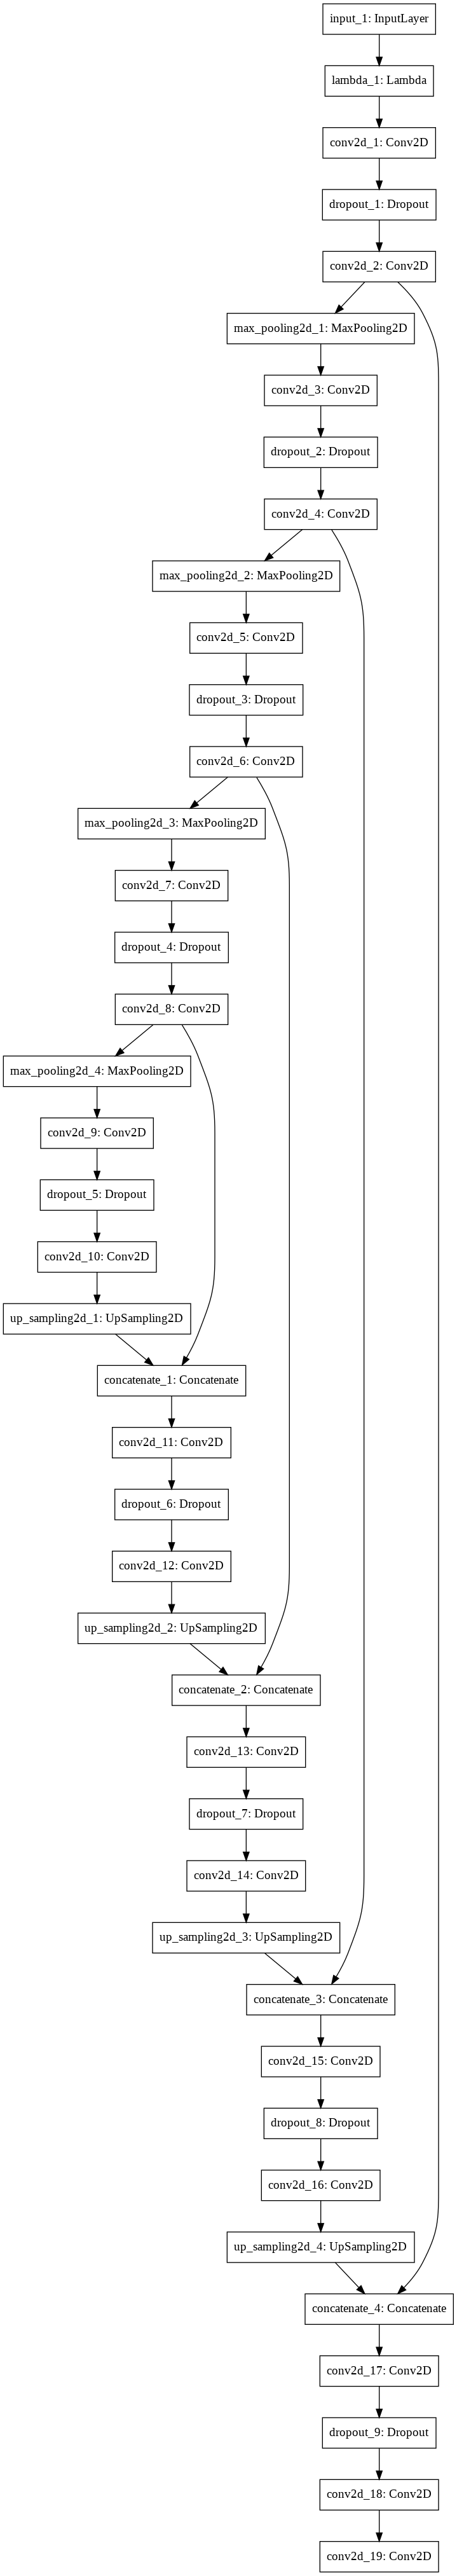

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Thesis_Model.png')

In [ ]:
files.upload()

Saving UNet_Model2.py to UNet_Model2 (4).py


{'UNet_Model2.py': b'# -*- coding: utf-8 -*-\n"""\nCreated on Tue Feb  4 18:27:15 2020\n\n@author: KiranKharel\n"""\nfrom keras.models import Model\nfrom keras.layers import Input, UpSampling2D,Conv2DTranspose\nfrom keras.layers.core import Dropout, Lambda\nfrom keras.layers.convolutional import Conv2D\nfrom keras.layers.pooling import MaxPooling2D\nfrom keras.layers import Concatenate\nfrom utils import mean_iou\n\n\nclass UNet:\n    def __init__(self, image_size = 128, img_channels = 3, kernel_size = (3,3), padding = \'same\', strides = 1, kernel_initializer = \'he_normal\', activation = \'relu\'):\n        self.image_size = image_size\n        self.img_channels = img_channels\n        self.kernel_size = kernel_size\n        self.padding = padding\n        self.strides = strides\n        self.kernel_initializer = kernel_initializer\n        self.activation = activation\n\n    def down_block(self, x, filters):\n        c = Conv2D(filters,\n                self.kernel_size, \n         

In [ ]:
def get_unet(dim=128, dropout=0.5, n_classes=3):

 inputs = Input((dim, dim, 1))
 conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
 conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
 pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

 conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
 conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
 pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

 conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
 conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
 pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

 conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
 conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
 conv4 = Dropout(dropout)(conv4)
 pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

 conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
 conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
 conv5 = Dropout(dropout)(conv5)

 up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=3)
 conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up6)
 conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

 up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=3)
 conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up7)
 conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

 up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=3)
 conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up8)
 conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

 up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=3)
 conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(up9)
 conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)

 conv10 = Conv2D(n_classes, (1, 1), activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
 conv10 = Reshape((dim * dim, n_classes))(conv10)

 output = Activation('softmax')(conv10)

 model = Model(inputs=[inputs], outputs=[output])
 model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

 return model

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/model_for_nuclei_2018_Bowl_shoayeb.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_accuracy'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

Epoch 1/15
38/38 [==============================] - 122s 3s/step - loss: 0.0706 - accuracy: 0.9721 - val_loss: 0.0825 - val_accuracy: 0.9675
Epoch 2/15
38/38 [==============================] - 119s 3s/step - loss: 0.0679 - accuracy: 0.9731 - val_loss: 0.0811 - val_accuracy: 0.9685
Epoch 3/15
38/38 [==============================] - 119s 3s/step - loss: 0.0674 - accuracy: 0.9735 - val_loss: 0.0834 - val_accuracy: 0.9673
Epoch 4/15
38/38 [==============================] - 120s 3s/step - loss: 0.0670 - accuracy: 0.9735 - val_loss: 0.0869 - val_accuracy: 0.9649


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import History 
import numpy

df_result = pd.DataFrame(results.History)
df_result.sort_values('val_loss', ascending=True, inplace = True)
df_result

AttributeError: ignored

In [ ]:
!mkdir -p saved_model
model.save('model_for_nuclei_2018_Bowl.h5')

In [ ]:
model.load_weights('/content/model_for_nuclei_2018_Bowl.h5')

In [ ]:

model.load_weights("/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-1.h5")
results = model.predict_generator(X_test,65,verbose=1)
saveResult("/content/drive/MyDrive/predict",results)

65/65 [==============================] - 6s 96ms/step


NameError: ignored

In [ ]:
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

import tensorflow as tf
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use("ggplot")
%matplotlib inline
import gc

from tqdm.notebook import trange, tqdm

from itertools import chain
from skimage.io import imread, imshow, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K

  
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import *

import random

In [ ]:

model = load_model('model-dsbowl2018-1.h5', custom_objects={'mean_iou': mean_iou})
preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
preds_test = model.predict(X_test, verbose=1)

# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)

# Create list of upsampled test masks
preds_test_upsampled = []
for i in range(len(preds_test)):
    preds_test_upsampled.append(resize(np.squeeze(preds_test[i]), 
                                       (sizes_test[i][0], sizes_test[i][1]), 
                                       mode='constant', preserve_range=True))

In [ ]:
#for_test_image
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model_for_nuclei_2018_Bowl.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_accuracy'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_test, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)


Train on 58 samples, validate on 7 samples


IndexError: ignored

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [ ]:
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout) 

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf. __version__) 


1.15.2


In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/content/drive/model_for_nuclei_2018_Bowl.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_accuracy'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

Epoch 1/15
 7/38 [====>.........................] - ETA: 59s - loss: 0.6638 - accuracy: 0.7482 

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_accuracy')
checkpointer = ModelCheckpoint('dataset/model-dsbowl2018-1.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])


Epoch 1/15
 21/250 [=>............................] - ETA: 9:13 - loss: 0.5717 - accuracy: 0.8018

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed = 42
np.random.seed = seed

IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3


In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout) 

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_accuracy')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])

In [ ]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, verbose=1,monitor='val_acc'),  tf.keras.callbacks.TensorBoard(log_dir='logs')]
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

Train on 603 samples, validate on 67 samples
Epoch 1/15
603/603 [==============================] - 111s 184ms/sample - loss: 0.0745 - acc: 0.9708 - val_loss: 0.0683 - val_acc: 0.9724
Epoch 2/15
603/603 [==============================] - 110s 183ms/sample - loss: 0.0762 - acc: 0.9702 - val_loss: 0.0795 - val_acc: 0.9696
Epoch 3/15
603/603 [==============================] - 111s 183ms/sample - loss: 0.0756 - acc: 0.9704 - val_loss: 0.0686 - val_acc: 0.9727
Epoch 4/15
603/603 [==============================] - 110s 183ms/sample - loss: 0.0731 - acc: 0.9713 - val_loss: 0.0655 - val_acc: 0.9734
Epoch 5/15
603/603 [==============================] - 111s 184ms/sample - loss: 0.0712 - acc: 0.9716 - val_loss: 0.0653 - val_acc: 0.9737
Epoch 6/15
603/603 [==============================] - 111s 183ms/sample - loss: 0.0730 - acc: 0.9711 - val_loss: 0.0648 - val_acc: 0.9736
Epoch 7/15
603/603 [==============================] - 111s 184ms/sample - loss: 0.0696 - acc: 0.9722 - val_loss: 0.0637 - val_a

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

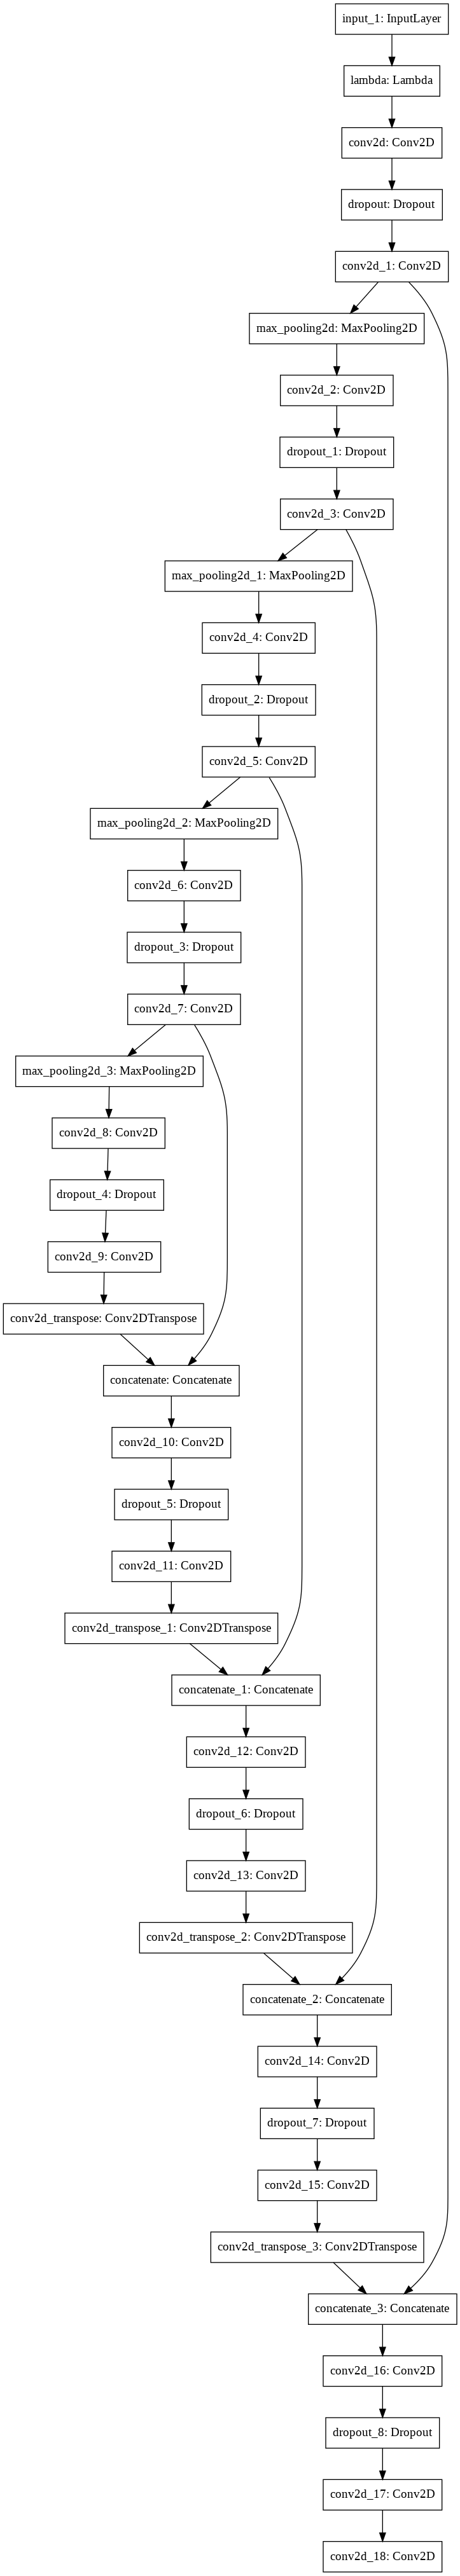

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model,to_file='Thesis_Model_UP_Con2D.png')

In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 128, 128, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 128, 128, 16) 448         lambda_2[0][0]                   
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 128, 128, 16) 0           conv2d_38[0][0]                  
____________________________________________________________________________________________

In [ ]:
#Modelcheckpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=3, verbose=1,monitor='val_acc')]
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=15, callbacks=callbacks)

Train on 603 samples, validate on 67 samples
Epoch 1/15
603/603 [==============================] - 83s 138ms/sample - loss: 0.3200 - acc: 0.8659 - val_loss: 0.1590 - val_acc: 0.9355
Epoch 2/15
603/603 [==============================] - 84s 139ms/sample - loss: 0.1589 - acc: 0.9367 - val_loss: 0.1402 - val_acc: 0.9440
Epoch 3/15
603/603 [==============================] - 84s 139ms/sample - loss: 0.1295 - acc: 0.9496 - val_loss: 0.1067 - val_acc: 0.9591
Epoch 4/15
603/603 [==============================] - 85s 140ms/sample - loss: 0.1127 - acc: 0.9567 - val_loss: 0.0918 - val_acc: 0.9642
Epoch 5/15
603/603 [==============================] - 83s 138ms/sample - loss: 0.1031 - acc: 0.9603 - val_loss: 0.0914 - val_acc: 0.9650
Epoch 6/15
603/603 [==============================] - 83s 138ms/sample - loss: 0.0954 - acc: 0.9633 - val_loss: 0.0900 - val_acc: 0.9667
Epoch 7/15
603/603 [==============================] - 83s 137ms/sample - loss: 0.0943 - acc: 0.9640 - val_loss: 0.1474 - val_acc: 0.9

In [ ]:
def Unet(input_img, n_filters = 16, dropout = 0.1, batchnorm = True):
    """Function to define the UNET Model"""
    # Contracting Path
    c1 = conv2d_block(input_img, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    p1 = MaxPooling2D((2, 2))(c1)
    p1 = Dropout(dropout)(p1)
    
    c2 = conv2d_block(p1, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    p2 = MaxPooling2D((2, 2))(c2)
    p2 = Dropout(dropout)(p2)
    
    c3 = conv2d_block(p2, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    p3 = MaxPooling2D((2, 2))(c3)
    p3 = Dropout(dropout)(p3)
    
    c4 = conv2d_block(p3, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    p4 = MaxPooling2D((2, 2))(c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters = n_filters * 16, kernel_size = 3, batchnorm = batchnorm)
    
    # Expansive Path
    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters * 8, kernel_size = 3, batchnorm = batchnorm)
    
    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters * 4, kernel_size = 3, batchnorm = batchnorm)
    
    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters * 2, kernel_size = 3, batchnorm = batchnorm)
    
    u9 = Conv2DTranspose(n_filters * 1, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = concatenate([u9, c1])
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters * 1, kernel_size = 3, batchnorm = batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [ ]:
from keras import backend as K
import gc
K.clear_session()
IMG_HEIGHT=128
IMG_WIDTH=128
input_img = Input((IMG_HEIGHT, IMG_WIDTH, 3), name='img')
model = Unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
metrics = ["accuracy", 
           tf.keras.metrics.AUC(), 
           tf.keras.metrics.SensitivityAtSpecificity(0.5), 
           tf.keras.metrics.SpecificityAtSensitivity(0.5)]
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=metrics)
gc.collect()

1947

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 16  448         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 128, 128, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                                                             

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard


callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model-Unet.h5', verbose=1, save_best_only=True, save_weights_only=True),
    TensorBoard(log_dir='./logs')
]

In [ ]:
results = model.fit(X_train, Y_train, batch_size=16, epochs=5, callbacks=callbacks, validation_data=val_generator, use_multiprocessing=True)


Epoch 1/5
42/42 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9554 - auc: 0.9815 - sensitivity_at_specificity: 0.9958 - specificity_at_sensitivity: 0.9974

Process Keras_worker_ForkPoolWorker-3:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 352, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [ ]:
import keras
image_size=128
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((image_size, image_size, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [ ]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 128, 128, 16  2320        ['conv2d_19[0][0]']              
                                )                                                           

In [ ]:
batch_size=16
train_steps = len(train_ids)//batch_size
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=3, verbose=1,monitor='val_acc')
checkpointer = ModelCheckpoint('/content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5', verbose=1, save_best_only=True)

results = model.fit_generator(train_generator, validation_data=val_generator, validation_steps=10, steps_per_epoch=250, epochs=15, callbacks=[earlystopper, checkpointer])

Epoch 1/15
250/250 [==============================] - ETA: 0s - loss: 0.1016 - acc: 0.9125
Epoch 00001: val_loss improved from inf to 0.08455, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5
250/250 [==============================] - 665s 3s/step - loss: 0.1016 - acc: 0.9125 - val_loss: 0.0845 - val_acc: 0.9684
Epoch 2/15
250/250 [==============================] - ETA: 0s - loss: 0.0919 - acc: 0.9149
Epoch 00002: val_loss improved from 0.08455 to 0.07604, saving model to /content/Nucleus-Segmentation-using-Deep-Learning-master/dataset/model-dsbowl2018-2.h5
250/250 [==============================] - 664s 3s/step - loss: 0.0919 - acc: 0.9149 - val_loss: 0.0760 - val_acc: 0.9715
Epoch 3/15
250/250 [==============================] - ETA: 0s - loss: 0.0883 - acc: 0.9158
Epoch 00003: val_loss did not improve from 0.07604
250/250 [==============================] - 665s 3s/step - loss: 0.0883 - acc: 0.9158 - val_loss: 0.0774 - val_acc: 0.9

In [ ]:
def dice_loss(y_true, y_pred):
    smooth = 1.
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    intersection = y_true * y_pred
    score = (2. * K.sum(intersection) + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)
    return 1. - score

def bce_dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

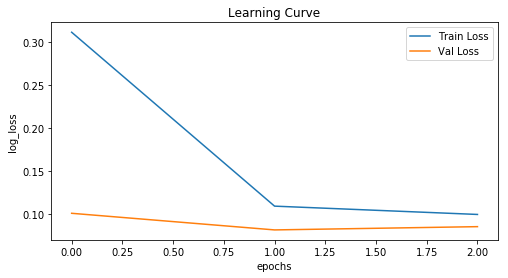

In [ ]:
#plotting the learning curve
plt.figure(figsize=(8,4))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Val Loss')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Learning Curve')
plt.ylabel('log_loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

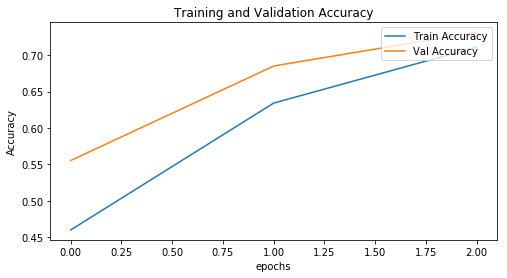

In [ ]:
#plotting the learning curve
plt.figure(figsize=(8,4))
plt.plot(results.history['mean_iou'], label='Train Accuracy')
plt.plot(results.history['val_mean_iou'], label='Val Accuracy')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

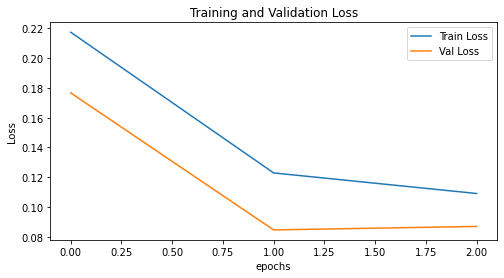

In [ ]:
#plotting the learning curve
plt.figure(figsize=(8,4))
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Val Loss')
#plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [ ]:
from keras.models import load_model
model1 = load_model('/content/model-dsbowl2018-1.h5', custom_objects={'mean_iou':mean_iou})
preds_train1 = model1.predict(X_train[:int(X_train.shape[0]*0.9)], verbose = 1)
preds_val1 = model1.predict(X_train[int(X_train.shape[0]*0.9):], verbose = 1)

#Threshold predictions
preds_train_thres1 = (preds_train1 > 0.5).astype(np.uint8)
preds_val_thres1 = (preds_val1 > 0.5).astype(np.uint8)

3/3 [==============================] - 3s 714ms/step


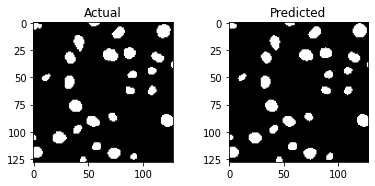

In [ ]:
#performing ceck on some random sample
ix = random.randint(0, len(preds_train_thres1))

fig, ax = plt.subplots(1, 2, figsize=(6,4))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
ax[0].imshow(np.squeeze(Y_train[ix]), cmap ='gray')
ax[1].imshow(np.squeeze(preds_train_thres1[ix]), cmap = 'gray')
ax[0].title.set_text('Actual')
ax[1].title.set_text('Predicted')

plt.show()

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm=confusion_matrix(Y_train,preds_train_thres1)

ValueError: ignored